# Calling libraries

In [4]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl

from numpy.random import randn
%matplotlib inline

In [5]:
titanic_df = pd.read_csv(r'/Users/omarabdelaleem/Downloads/Titanc.csv')


In [6]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Getting overall info for the data set
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# First Question: Who are the passengers?

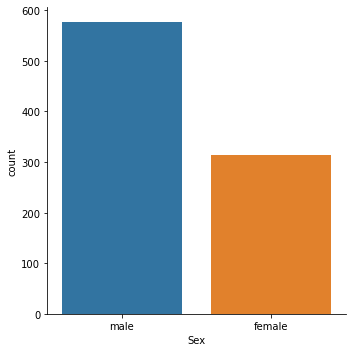

In [8]:
#Quick Gender
sns.catplot(x='Sex',data=titanic_df,kind='count')

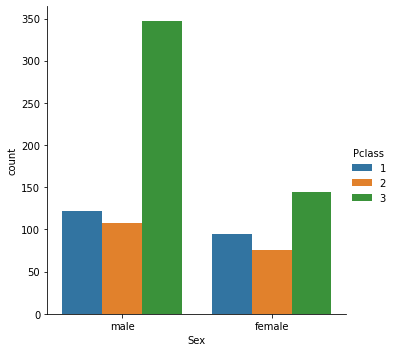

In [9]:
#Separation for genderes by classes
sns.catplot(x='Sex',data=titanic_df,hue='Pclass',kind='count')

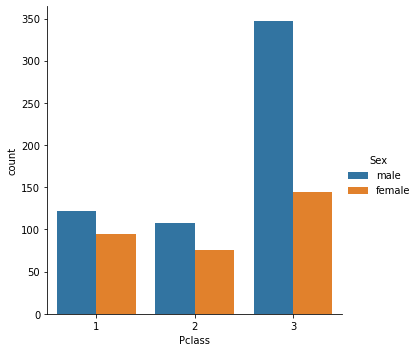

In [10]:
#Separation for classes by gender
sns.catplot(x='Pclass',data=titanic_df,hue='Sex',kind='count')

In [11]:
#We've made this function to creat a new 'Person' column
def male_female_child(Passenger):
    age,sex = Passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [12]:
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [13]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


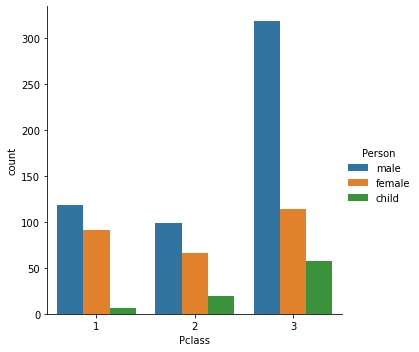

In [14]:
sns.catplot(x='Pclass',data=titanic_df,kind='count',hue='Person')

<AxesSubplot:>

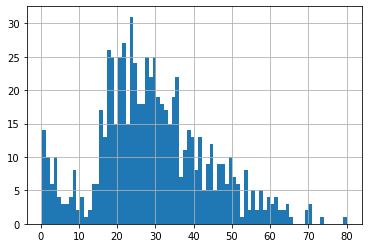

In [15]:
titanic_df['Age'].hist(bins=80)

In [17]:
titanic_df['Age'].mean()

29.69911764705882

In [18]:
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

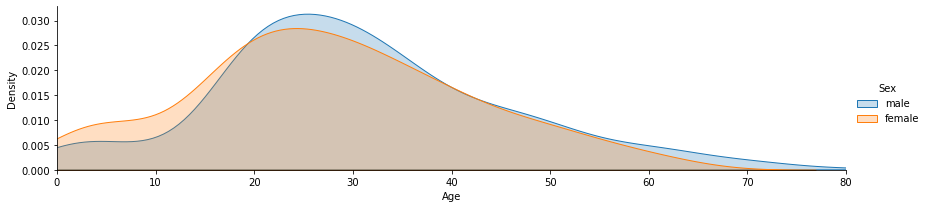

In [19]:
#Creating an object called fig using seaborn.FacetGrid
#FacitGrid allows you to do multiple plots on one figure
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

#Creating an object called oldest to set max age
oldest= titanic_df['Age'].max()

#setting limits to be from 0 to oldest
fig.set(xlim=(0,oldest))

#Manually adding legend by using .add_legend() method.
fig.add_legend()

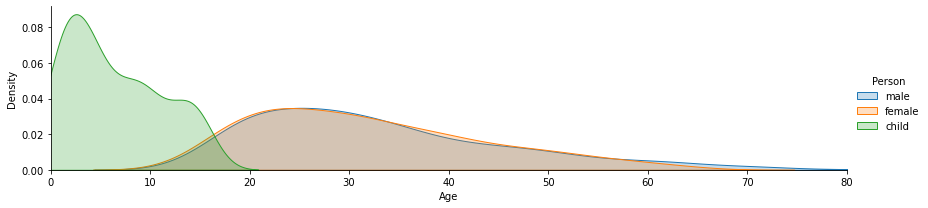

In [20]:
#Creating an object called fig using seaborn.FacetGrid
#FacitGrid allows you to do multiple plots on one figure
fig = sns.FacetGrid(titanic_df,hue='Person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

#Creating an object called oldest to set max age
oldest= titanic_df['Age'].max()

#setting limits to be from 0 to oldest
fig.set(xlim=(0,oldest))

#Manually adding legend by using .add_legend() method.
fig.add_legend()

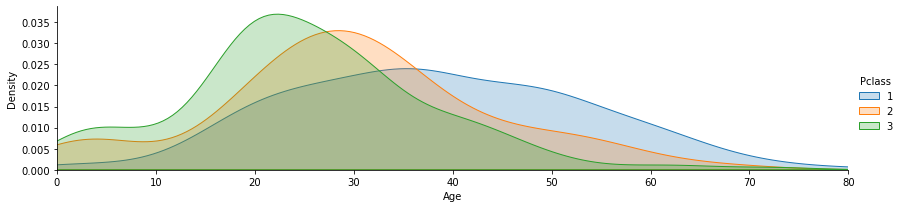

In [21]:
#Creating an object called fig using seaborn.FacetGrid
#FacitGrid allows you to do multiple plots on one figure
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

#Creating an object called oldest to set max age
oldest= titanic_df['Age'].max()

#setting limits to be from 0 to oldest
fig.set(xlim=(0,oldest))

#Manually adding legend by using .add_legend() method.
fig.add_legend()

# Question 2: What deck was passengers on, and how did it affect thier class?

In [22]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [23]:
#Creating Deck object and dropping all NaN Values
deck = titanic_df['Cabin'].dropna()

In [24]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

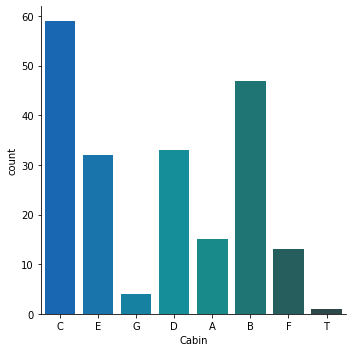

In [57]:
#We only want the first letter of the cabin name to classify it
#Creating an empty list to be filled by the for loop
levels=[]

#for loop
for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.catplot(x='Cabin',data=cabin_df,palette='winter_d',kind='count')
    

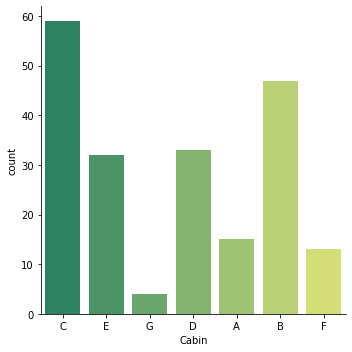

In [48]:
#Excluding 'T' value cause it's not making sense to be there
cabin_df = cabin_df[cabin_df!='T']
sns.catplot(x='Cabin',data=cabin_df,palette='summer',kind='count')
    

In [42]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


# Question 3: Where did these passengers come from?

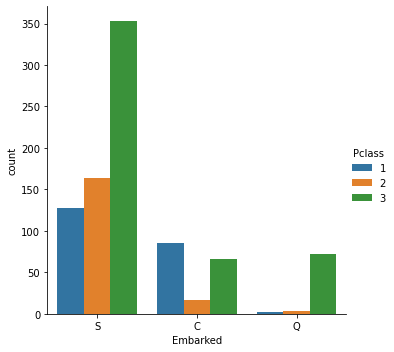

In [47]:
sns.catplot(x='Embarked',data=titanic_df,kind='count',hue='Pclass')

# Question 4: Who was alone, and who was with family?

In [58]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [59]:
#Creating new column to define who was alone and who was with family
titanic_df['Alone']=titanic_df.SibSp + titanic_df.Parch

In [61]:
#Any value but 0 means they're not alone
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [63]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone']==0]= 'Alone'

/Users/omarabdelaleem/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [64]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


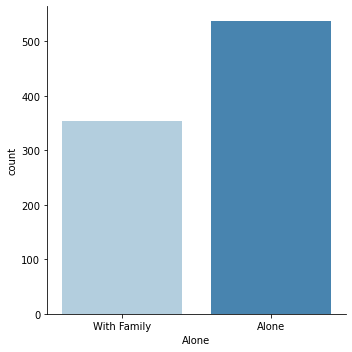

In [68]:
sns.catplot(x='Alone',data=titanic_df,kind='count',palette='Blues')

In [70]:
titanic_df['Survivor']=titanic_df.Survived.map({0:'no',1:'yes'})

In [71]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


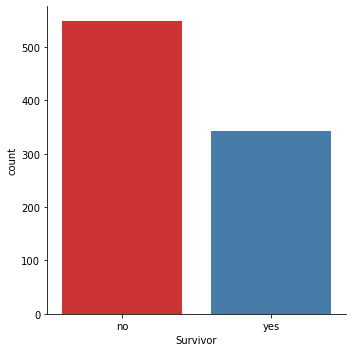

In [74]:
sns.catplot(x='Survivor',data=titanic_df,kind='count',palette = 'Set1')

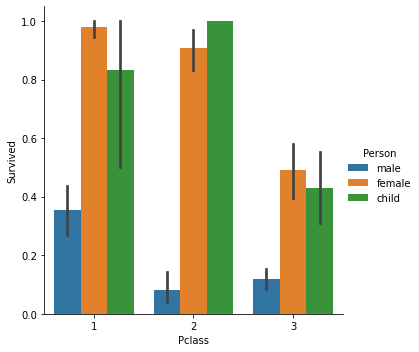

In [89]:
#Checking factors affectin in surviving from Titanic, and asking if 'Class' or 'Gender' were effective in this
sns.catplot(x='Pclass',data=titanic_df,y='Survived',kind='bar',legend=True,hue='Person')

Findings: Beeing a man in the third class is way too bad for your chances of survivnig what happened in Titanic
    and being a man in Titanic is not good for you at all in all classes.
    
    

/Users/omarabdelaleem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


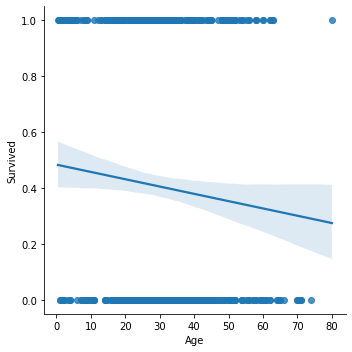

In [90]:
sns.lmplot('Age','Survived',data=titanic_df)

all points on 1 are for the people who survived, and all the points on 0 are for people who didn't make it.

Findings: The older the passenger, the less likely they survived.

/Users/omarabdelaleem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


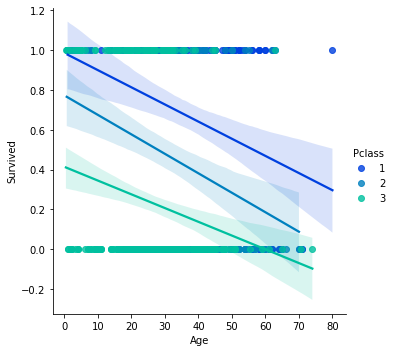

In [92]:
#Adding the hue argument to see if the Class factor affected survivng or not.
sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass',palette='winter')

/Users/omarabdelaleem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


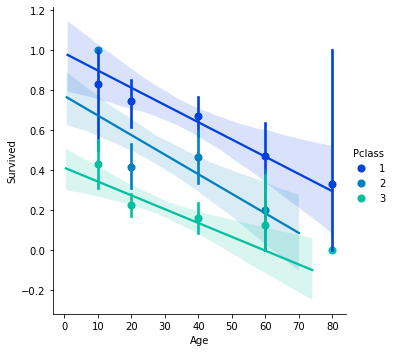

In [93]:
#Using X-bin method to clean the fig more
generations = [10,20,40,60,80]

sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)


/Users/omarabdelaleem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


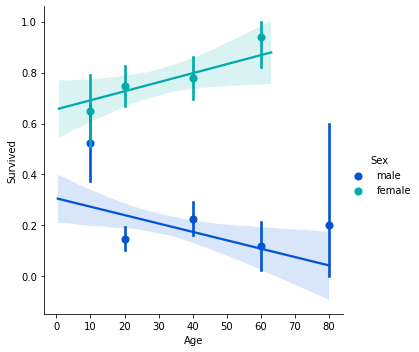

In [94]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

Findings: If you are an older female, you have better chances of surviving more than an older male